In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt
import seaborn

[*********************100%%**********************]  12 of 12 completed


Ticker  AAPL  AMZN   CRM  CSCO  GOOG   IBM  INTC    KO  MSFT   PEP   TGT   WMT
Ticker                                                                        
AAPL    1.00  0.88  0.85  0.81  0.96  0.43  0.52  0.92  0.98  0.95  0.95  0.94
AMZN    0.88  1.00  0.98  0.89  0.91  0.16  0.81  0.80  0.92  0.83  0.88  0.92
CRM     0.85  0.98  1.00  0.88  0.89  0.14  0.81  0.78  0.91  0.80  0.88  0.90
CSCO    0.81  0.89  0.88  1.00  0.87  0.28  0.78  0.86  0.88  0.86  0.79  0.88
GOOG    0.96  0.91  0.89  0.87  1.00  0.39  0.63  0.89  0.98  0.91  0.96  0.90
IBM     0.43  0.16  0.14  0.28  0.39  1.00 -0.06  0.44  0.37  0.43  0.36  0.34
INTC    0.52  0.81  0.81  0.78  0.63 -0.06  1.00  0.53  0.63  0.53  0.58  0.67
KO      0.92  0.80  0.78  0.86  0.89  0.44  0.53  1.00  0.93  0.98  0.84  0.91
MSFT    0.98  0.92  0.91  0.88  0.98  0.37  0.63  0.93  1.00  0.95  0.95  0.96
PEP     0.95  0.83  0.80  0.86  0.91  0.43  0.53  0.98  0.95  1.00  0.86  0.93
TGT     0.95  0.88  0.88  0.79  0.96  0.36  0.58  0.

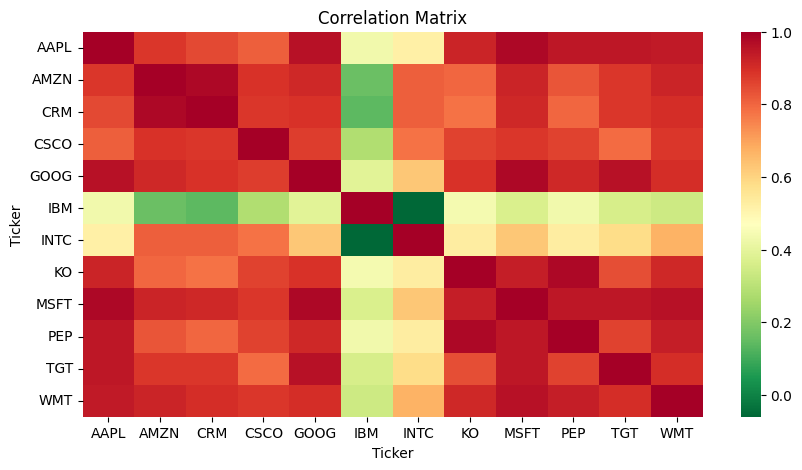

In [6]:
# Define the list of symbols to analyze
symbol_list = ['AAPL', 'AMZN', 'GOOG', 'CSCO', 'IBM', 'INTC', 'KO', 'PEP', 'MSFT', 'CRM', 'TGT', 'WMT']

# Download historical data for the symbols
data = yf.download(symbol_list, start='2014-01-01', end='2023-03-25')['Adj Close']

# Calculate and visualize correlation matrix
matrix = data.corr().round(2)
print(matrix)
fig, ax = plt.subplots(figsize=(10,5))  # Sample figsize in inches
seaborn.heatmap(matrix, cmap='RdYlGn_r', annot=False)
plt.title('Correlation Matrix')
plt.show()


In [4]:
# Function to find cointegrated pairs
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[symbol_list[i]]
            S2 = data[symbol_list[j]]
            
            # Check for missing or infinite values
            if S1.isnull().any() or S2.isnull().any() or np.isinf(S1).any() or np.isinf(S2).any():
                continue
            
            # Test for cointegration
            result = coint(S1, S2, trend="ct", maxlag=10, autolag=None)
            score = result[0]  # Cointegration score
            pvalue = result[1]  # P-value of the cointegration test
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.10:  # Check significance level
                pairs.append((symbol_list[i], symbol_list[j]))
    return score_matrix, pvalue_matrix, pairs


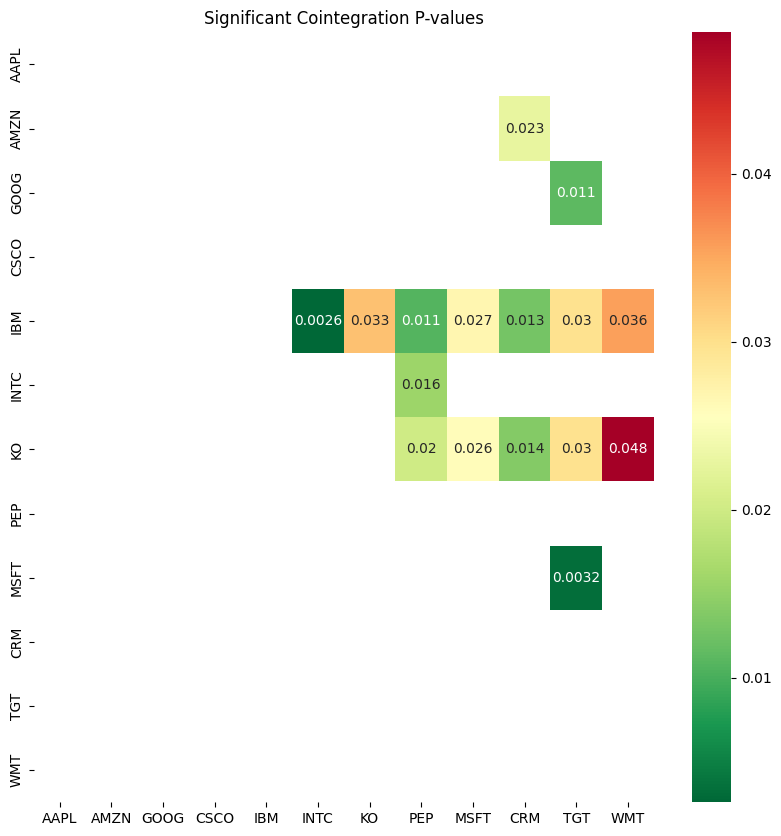

In [9]:
# Find cointegrated pairs
scores, pvalues, pairs = find_cointegrated_pairs(data)

# Visualize significant cointegration results
fig, ax = plt.subplots(figsize=(10,10))  # Sample figsize in inches
seaborn.heatmap(
    pvalues, 
    xticklabels=symbol_list, 
    yticklabels=symbol_list, 
    cmap='RdYlGn_r', 
    mask=(pvalues >= 0.05),  # Mask insignificant p-values
    annot=True
)
plt.title('Significant Cointegration P-values')
plt.show()